In [2]:
# Mount the Google Drive folder
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## OPENFACE AVERAGE

In [28]:
# Importing our Utilities functions:
from utils import CautDataloaderRegular
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
    
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def SVM_Model(data_mode,
              csv_path,
              data_dir,
              approach_type=None,
              batch_size=32,
              threshold=0.5,
              train_verbose=True):

     X_y_data= CautDataloaderRegular.get_X_y_TrainTest_Visual(csv_path=csv_path,
                                                           data_dir=data_dir,
                                                           data_mode=data_mode,
                                                           approach_type="average",
                                                           verbose= train_verbose)

     X_train, y_train =   X_y_data[0],   X_y_data[1]
     X_test, y_test =   X_y_data[2],   X_y_data[3]

     clf = svm.SVC(kernel='linear')
    
     clf.fit(X_train, y_train)

     y_pred = clf.predict(X_test)

    #get metrics (accuracy, precision, recall)
     accuracy = accuracy_score(y_test, y_pred)
     precision = precision_score(y_test, y_pred)
     recall = recall_score(y_test, y_pred)
     print("Accuracy:", accuracy)
     print("Precision", precision)
     print("Recall", recall)
    
    # show confusion matrix
     CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)


Selected csv_path: /content/drive/MyDrive/606 Capstone/
Video failed to be processed by OpenFace. Videoname=trial_lie_015_008.
Processed 100 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Video failed to be processed by OpenFace. Videoname=trial_lie_053_007.
Processed 200 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Processed 300 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Processed 400 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Video failed to be processed by OpenFace. Videoname=trial_lie_053_006.
Processed 500 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Video failed to be processed by OpenFace. Videoname=trial_truth_025_008.
Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Video failed to be processed by OpenFace. Videoname=trial_lie_053_002.
Processed 100 / 223
  - Samp

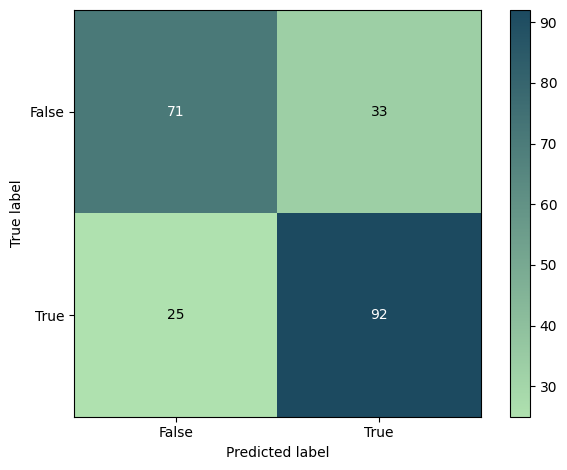

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 92
     - False Positive           : 33
     - True Negative            : 71
     - False Negative           : 25
     - True Positive Rate       :  0.7863247863247863
     - True Negative Rate       :  0.6826923076923077
     - Positive Predictive Value:  0.736
     - Negative predictive value:  0.7395833333333334
     - False Positive Rate      :  0.3173076923076923
     - False Negative Rate      :  0.21367521367521367
     - False Discovery Rate     :  0.264


In [20]:
SVM_Model(data_mode="OpenFace",
          csv_path="/content/drive/MyDrive/606 Capstone/",
          data_dir="/content/drive/MyDrive/606 Capstone/OpenFace_Final",
          approach_type="average",
          threshold=0.5,
          train_verbose=False)

### OPENFACE SEQUENTIAL

In [44]:
# # Modelling
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import randint
    
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# def SVM_Model_Seq(data_mode,
#               csv_path,
#               data_dir,
#               approach_type=None,
#               batch_size=32,
#               threshold=0.5,
#               train_verbose=True):

#      X_y_data= CautDataloaderRegular.get_X_y_TrainTest_Visual(csv_path=csv_path,
#                                                            data_dir=data_dir,
#                                                            data_mode=data_mode,
#                                                            approach_type=approach_type,
#                                                            verbose= train_verbose)

#      X_train, y_train = X_y_data[0].reshape(X_y_data[0].shape[0], -1), X_y_data[1]
#      X_test, y_test = X_y_data[2].reshape(X_y_data[2].shape[0], -1), X_y_data[3]

#      # precomputed kernel
#      gram_train = np.dot(X_train, X_train.T)
#      clf = svm.SVC(kernel='precomputed')
#      clf.fit(gram_train, y_train)

#      # predict on test set
#      gram_test = np.dot(X_test, X_train.T)
#      y_pred = clf.predict(gram_test)

#      # get metrics (accuracy, precision, recall)
#      accuracy = accuracy_score(y_test, y_pred)
#      precision = precision_score(y_test, y_pred)
#      recall = recall_score(y_test, y_pred)
#      print("Accuracy:", accuracy)
#      print("Precision", precision)
#      print("Recall", recall)
    
#      # show confusion matrix
#      CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)


Adding HistGradientBoostingClassifier so that the model is competant to handle any Nan values .
The reshape method is used to flatten the input data in the line X_train, y_train = X_y_data[0].reshape(len(X_y_data[0]), -1), X_y_data[1] and X_test, y_test = X_y_data[2].reshape(len(X_y_data[2]), -1), X_y_data[3]. Also, HistGradientBoostingClassifier is used instead of SVC to handle missing values.

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def HistGradientBoostingClassifier_Model_Seq(data_mode,
                                             csv_path,
                                             data_dir,
                                             approach_type=None,
                                             batch_size=32,
                                             threshold=0.5,
                                             train_verbose=True):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Visual(csv_path=csv_path,
                                                              data_dir=data_dir,
                                                              data_mode=data_mode,
                                                              approach_type=approach_type,
                                                              verbose=train_verbose)

    X_train, y_train = X_y_data[0].reshape(len(X_y_data[0]), -1), X_y_data[1]
    X_test, y_test = X_y_data[2].reshape(len(X_y_data[2]), -1), X_y_data[3]

    clf = HistGradientBoostingClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)

    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)



Selected csv_path: /content/drive/MyDrive/606 Capstone/
Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Accuracy: 0.7568807339449541
Precision 0.7719298245614035
Recall 0.7652173913043478


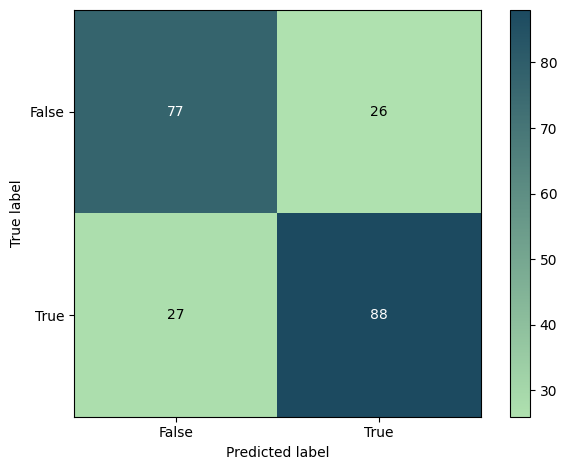

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 88
     - False Positive           : 26
     - True Negative            : 77
     - False Negative           : 27
     - True Positive Rate       :  0.7652173913043478
     - True Negative Rate       :  0.7475728155339806
     - Positive Predictive Value:  0.7719298245614035
     - Negative predictive value:  0.7403846153846154
     - False Positive Rate      :  0.2524271844660194
     - False Negative Rate      :  0.23478260869565218
     - False Discovery Rate     :  0.22807017543859648


In [47]:
HistGradientBoostingClassifier_Model_Seq(data_mode="OpenFace",
          csv_path="/content/drive/MyDrive/606 Capstone/",
          data_dir="/content/drive/MyDrive/606 Capstone/OpenFace 2",
          approach_type="sequential",
          threshold=0.5,
          train_verbose=False)

## MEDIAPIPE VIDEO

In [52]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
    
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def SVM_Model_MediaPipe(data_mode,
                        csv_path,
                        data_dir,
                        approach_type=None,
                        batch_size=32,
                        threshold=0.5,
                        train_verbose=True):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Visual(csv_path=csv_path,
                                                               data_dir=data_dir,
                                                               data_mode=data_mode,
                                                               input_length_in_seconds=3,
                                                               approach_type=approach_type,
                                                               verbose=train_verbose)

    X_train, y_train = X_y_data[0].reshape(len(X_y_data[0]), -1), X_y_data[1]
    X_test, y_test = X_y_data[2].reshape(len(X_y_data[2]), -1), X_y_data[3]

    # precomputed kernel
    gram_train = np.dot(X_train, X_train.T)
    clf = svm.SVC(kernel='precomputed')
    clf.fit(gram_train, y_train)

    # predict on test set
    gram_test = np.dot(X_test, X_train.T)
    y_pred = clf.predict(gram_test)

    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)

    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)



Selected csv_path: /content/drive/MyDrive/606 Capstone/
Accuracy: 0.7174887892376681
Precision 0.7522935779816514
Recall 0.6949152542372882


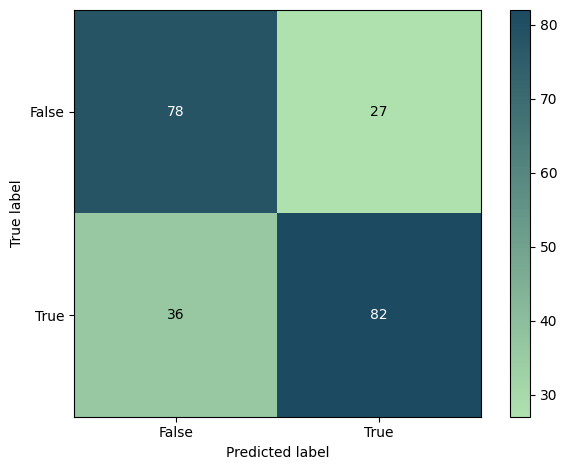

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 82
     - False Positive           : 27
     - True Negative            : 78
     - False Negative           : 36
     - True Positive Rate       :  0.6949152542372882
     - True Negative Rate       :  0.7428571428571429
     - Positive Predictive Value:  0.7522935779816514
     - Negative predictive value:  0.6842105263157895
     - False Positive Rate      :  0.2571428571428571
     - False Negative Rate      :  0.3050847457627119
     - False Discovery Rate     :  0.24770642201834864


In [53]:
SVM_Model_MediaPipe(data_mode="MediaPipe",
          csv_path="/content/drive/MyDrive/606 Capstone/",
          data_dir="/content/drive/MyDrive/606 Capstone/mediaPipe_keypoints_data_UPD 2",
          threshold=0.5,
          train_verbose=False)